In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Create a dataset

In [70]:
X = tf.range(1, 100, 1, tf.float32)
y = X + 10

## Model 1 (single layer)

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# tweak the below hyperparameters to see varying training losses
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0015),
    metrics=["mae", "accuracy"]
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 894us/step - loss: 11.4403 - mae: 11.4403 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 804us/step - loss: 4.2722 - mae: 4.2722 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 744us/step - loss: 4.3337 - mae: 4.3337 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 896us/step - loss: 4.8928 - mae: 4.8928 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 802us/step - loss: 4.8478 - mae: 4.8478 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 837us/step - loss: 4.6689 - mae: 4.6689 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 749us/step - loss: 4.5786 - mae: 4.5786 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 771us/step - loss: 4.3266 - mae: 4.3266 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 698us/st

## Model 2 (multi layer, MAE)

In [72]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# SGD with MAE works but NOT QUITE WELL
# SGD with MSE doesn't work AT ALL
# Adam with MAE or MSE works well
# With MAE, Adam doesn't require a lot of epochs

# By "working well" I mean minimizing training losses here

model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=600)

Epoch 1/600
4/4 [==============================] - 0s 1ms/step - loss: 73.0269 - mae: 73.0269
Epoch 2/600
4/4 [==============================] - 0s 865us/step - loss: 67.5253 - mae: 67.5253
Epoch 3/600
4/4 [==============================] - 0s 771us/step - loss: 62.2141 - mae: 62.2141
Epoch 4/600
4/4 [==============================] - 0s 905us/step - loss: 56.7640 - mae: 56.7640
Epoch 5/600
4/4 [==============================] - 0s 898us/step - loss: 51.3532 - mae: 51.3532
Epoch 6/600
4/4 [==============================] - 0s 875us/step - loss: 45.8987 - mae: 45.8987
Epoch 7/600
4/4 [==============================] - 0s 988us/step - loss: 40.1474 - mae: 40.1474
Epoch 8/600
4/4 [==============================] - 0s 818us/step - loss: 34.6099 - mae: 34.6099
Epoch 9/600
4/4 [==============================] - 0s 957us/step - loss: 28.9140 - mae: 28.9140
Epoch 10/600
4/4 [==============================] - 0s 781us/step - loss: 22.9771 - mae: 22.9771
Epoch 11/600
4/4 [=======================

## Model 3 (double layer, MSE)

In [73]:
X_1 = tf.range(1, 100, 1, tf.float32)
y_1 = X_1 ** 2 + 1

In [74]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 943us/step - loss: 7844.5166 - mse: 7844.5166
Epoch 2/500
4/4 [==============================] - 0s 774us/step - loss: 6882.8208 - mse: 6882.8208
Epoch 3/500
4/4 [==============================] - 0s 770us/step - loss: 5992.4663 - mse: 5992.4663
Epoch 4/500
4/4 [==============================] - 0s 844us/step - loss: 5182.8032 - mse: 5182.8032
Epoch 5/500
4/4 [==============================] - 0s 769us/step - loss: 4438.4375 - mse: 4438.4375
Epoch 6/500
4/4 [==============================] - 0s 706us/step - loss: 3790.1289 - mse: 3790.1289
Epoch 7/500
4/4 [==============================] - 0s 655us/step - loss: 3202.6252 - mse: 3202.6252
Epoch 8/500
4/4 [==============================] - 0s 771us/step - loss: 2688.8279 - mse: 2688.8279
Epoch 9/500
4/4 [==============================] - 0s 676us/step - loss: 2216.2764 - mse: 2216.2764
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1803.4908 - mse: 1803.4908
E

## Visualizing the models with new test data

In [75]:
X_test = tf.range(100, 200, 1, tf.float32)
y_test = X_test + 10

4/4 [==============================] - 0s 2ms/step


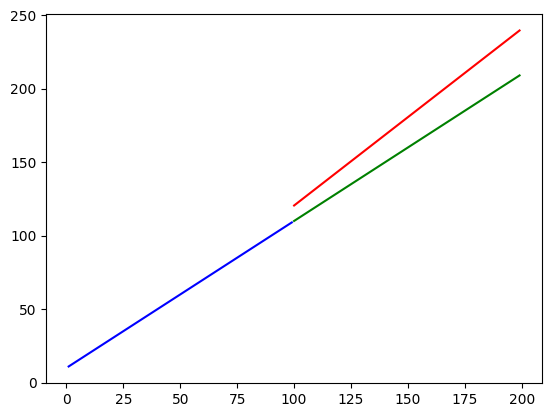

In [76]:
# model predictions

y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred, c="r")

4/4 [==============================] - 0s 592us/step


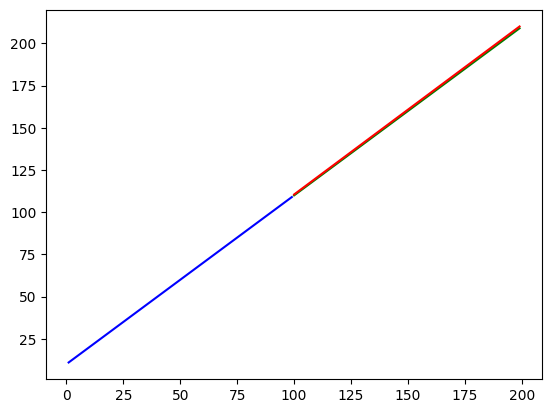

In [77]:
# model_1 predictions

y_pred_1 = model_1.predict(X_test)
y_pred_1 = tf.squeeze(y_pred_1)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_1, c="r")

4/4 [==============================] - 0s 696us/step


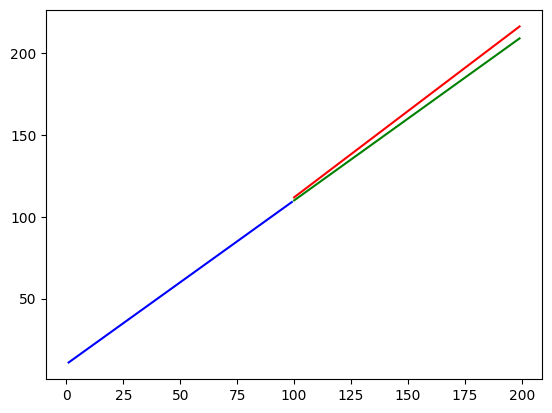

In [78]:
# model_2 predictions

y_pred_2 = model_2.predict(X_test)
y_pred_2 = tf.squeeze(y_pred_2)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_2, c="r")